## What factors impact heat related hospitalizations in NYC?

<B>Organized by community district (CD), I'm looking at facets of climate and socioeconomic data to see what associations exist

#Keys: Percent = percentage of land with vegetative structures; Degrees = Daytime summer surface temperature; Score = Heat Vulnerability Index; HospRate = Age adjusted rate of heat related hospitalizations per 100,000
    

In [1]:
#Loading all the things!

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
df = pd.read_csv("sample.csv") #this has some merging from my scratchpad
dfHosp = pd.read_csv("CD_Hospitalizations.csv")

df2 = pd.merge(df, dfHosp, on='Geography', how='left')
df2

,GeoType,Geography,Percent,Degrees,Score,Time,GeoTypeDesc,GeoID,GeoRank,10th percentile ppb,90th percentile ppb,Mean_ppb,HospRate
0,CD,Financial District (CD1),21.9,94,1,Summer 2021,Community District,101,6,26.8,29.3,28.0,0.6
1,CD,Greenwich Village and Soho (CD2),15.3,98,2,Summer 2021,Community District,102,6,26.7,28.9,27.9,0.3
2,CD,Lower East Side and Chinatown (CD3),25.9,98,3,Summer 2021,Community District,103,6,27.1,29.7,28.4,0.8
3,CD,Clinton and Chelsea (CD4),12.8,98,2,Summer 2021,Community District,104,6,25.9,28.6,27.3,0.7
4,CD,Midtown (CD5),4.7,98,3,Summer 2021,Community District,105,6,25.8,27.9,26.9,1.2
5,CD,Stuyvesant Town and Turtle Bay (CD6),20.8,97,2,Summer 2021,Community District,106,6,25.8,29.3,27.2,0.7
6,CD,Upper West Side (CD7),28.9,96,1,Summer 2021,Community District,107,6,26.5,28.9,27.8,0.9
7,CD,Upper East Side (CD8),21.7,97,1,Summer 2021,Community District,108,6,26.6,29.6,27.8,0.6
8,CD,Morningside Heights and Hamilton Heights (CD9),32.4,95,3,Summer 2021,Community District,109,6,27.0,29.9,28.6,1.7
9,CD,Central Harlem (CD10),24.3,98,5,Summer 2021,Community District,110,6,27.6,29.4,28.6,1.5


In [5]:
dfPoverty = pd.read_csv("CD_Poverty.csv")
dfCombined = pd.merge(df2, dfPoverty, on='Geography', how='left')
df = dfCombined
df.to_csv('Merged.csv', index=False)

In [6]:
%%R
df <- read.csv("Merged.csv")
# load the dataset
data(df)

# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("HospRate ~ Percent_Poverty + Percent + Score + Degrees" , data = df)

# summarize the regression results
summary(fit)





Call:
lm(formula = "HospRate ~ Percent_Poverty + Percent + Score + Degrees", 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89753 -0.29663 -0.03548  0.18593  1.33331 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      3.129018   4.573313   0.684  0.49678   
Percent_Poverty  0.029384   0.011720   2.507  0.01521 * 
Percent          0.020656   0.007357   2.808  0.00693 **
Score            0.271492   0.098929   2.744  0.00821 **
Degrees         -0.036416   0.047477  -0.767  0.44641   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5434 on 54 degrees of freedom
Multiple R-squared:  0.5205,	Adjusted R-squared:  0.485 
F-statistic: 14.65 on 4 and 54 DF,  p-value: 3.628e-08



In [7]:
%%R
# load the dataset
data(df)


# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("HospRate ~ Degrees" , data = df)

# summarize the regression results
summary(fit)



Call:
lm(formula = "HospRate ~ Degrees", data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2114 -0.5619 -0.0377  0.4512  1.8643 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.81421    4.74884  -1.224    0.226
Degrees      0.07475    0.04842   1.544    0.128

Residual standard error: 0.7484 on 57 degrees of freedom
Multiple R-squared:  0.04013,	Adjusted R-squared:  0.02329 
F-statistic: 2.383 on 1 and 57 DF,  p-value: 0.1282



<B>Shows me that its very clearly not just surface temperature that impacts Heat related hospitalizations

In [8]:
%%R
# load the dataset
data(df)


# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("HospRate ~ Percent + Score + Degrees" , data = df)

# summarize the regression results
summary(fit)


Call:
lm(formula = "HospRate ~ Percent + Score + Degrees", data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92396 -0.35177 -0.04469  0.24321  1.53401 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.557670   4.416500   1.711  0.09267 .  
Percent      0.021747   0.007689   2.828  0.00651 ** 
Score        0.455931   0.069252   6.584 1.81e-08 ***
Degrees     -0.081918   0.045931  -1.783  0.08003 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.569 on 55 degrees of freedom
Multiple R-squared:  0.4646,	Adjusted R-squared:  0.4354 
F-statistic: 15.91 on 3 and 55 DF,  p-value: 1.438e-07



In [17]:
%%R
# load the dataset
data(df)


# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("HospRate ~ I(Percent**2) + I(Score**2) + I(Degrees**2) + I(Percent_Poverty**2)" , data = df)

# summarize the regression results
summary(fit)


Call:
lm(formula = "HospRate ~ I(Percent**2) + I(Score**2) + I(Degrees**2) + I(Percent_Poverty**2)", 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76416 -0.28452 -0.07733  0.19512  1.51916 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           2.7519541  2.2619537   1.217  0.22904   
I(Percent^2)          0.0002499  0.0001093   2.285  0.02624 * 
I(Score^2)            0.0508905  0.0156757   3.246  0.00201 **
I(Degrees^2)         -0.0002329  0.0002394  -0.973  0.33506   
I(Percent_Poverty^2)  0.0004697  0.0002617   1.795  0.07827 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5609 on 54 degrees of freedom
Multiple R-squared:  0.4892,	Adjusted R-squared:  0.4513 
F-statistic: 12.93 on 4 and 54 DF,  p-value: 1.89e-07



In [10]:
%%R
# load the dataset
data(df)


# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("Score ~ I(Percent**2) + I(Degrees**2) + I(Percent_Poverty**2)" , data = df)

# summarize the regression results
summary(fit)


Call:
lm(formula = "Score ~ I(Percent**2) + I(Degrees**2) + I(Percent_Poverty**2)", 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57346 -0.56134 -0.08567  0.52658  2.02489 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.142e+01  2.743e+00  -4.165 0.000111 ***
I(Percent^2)         -3.749e-04  1.513e-04  -2.479 0.016282 *  
I(Degrees^2)          1.454e-03  2.821e-04   5.154 3.57e-06 ***
I(Percent_Poverty^2)  1.782e-03  2.536e-04   7.026 3.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7938 on 55 degrees of freedom
Multiple R-squared:  0.7112,	Adjusted R-squared:  0.6955 
F-statistic: 45.15 on 3 and 55 DF,  p-value: 7.455e-15



<B>wait woah that's much higher than before -- seeing what factors make for high heat vulnerability index

In [11]:
%%R
# load the dataset
data(df)


# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm("HospRate ~ I(log(Percent)) + I(log(Score)) + I(log(Degrees)) + I(log(Percent_Poverty))" , data = df)

# summarize the regression results
summary(fit)


Call:
lm(formula = "HospRate ~ I(log(Percent)) + I(log(Score)) + I(log(Degrees)) + I(log(Percent_Poverty))", 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09528 -0.33697 -0.07567  0.32184  1.41104 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)               3.7813    22.1594   0.171  0.86514   
I(log(Percent))           0.4665     0.1974   2.363  0.02174 * 
I(log(Score))             0.4503     0.2471   1.822  0.07395 . 
I(log(Degrees))          -1.3288     4.8205  -0.276  0.78386   
I(log(Percent_Poverty))   0.6667     0.2110   3.159  0.00259 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5628 on 54 degrees of freedom
Multiple R-squared:  0.4857,	Adjusted R-squared:  0.4477 
F-statistic: 12.75 on 4 and 54 DF,  p-value: 2.246e-07



## Interesting to me that poverty is what changed it the most ??? Time to make some calls and maybe test some more things!

<B> .45 for my adjusted R squared isn't bad but it's not super high either, though we have a low p value so it's not likely that this is due to chance alone 

`geom_smooth()` using formula = 'y ~ x'


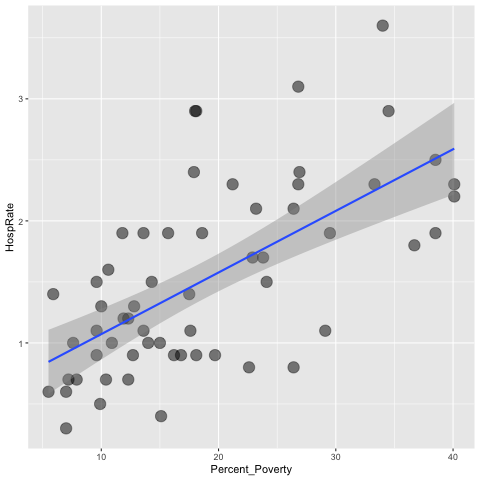

In [12]:
%%R -i df
library(ggplot2)

# load the dataset
data(df)
ggplot(df, aes(x=Percent_Poverty, y=HospRate)) + geom_point(size=5, alpha=.5) + geom_smooth(method=lm)

In [22]:
dfRedline = pd.read_csv("Redlining.csv")
dfMerged = pd.read_csv("Merged.csv")
dfComplete = pd.merge(dfMerged, dfRedline, on='GeoID', how='left')
df = dfComplete
df.to_csv('Complete.csv', index=False)

In [23]:
df = pd.read_csv("Complete.csv")
df

,GeoType,Geography,Percent,Degrees,Score,Time,GeoTypeDesc,GeoID,GeoRank,10th percentile ppb,90th percentile ppb,Mean_ppb,HospRate,Percent_Poverty,Perc_Dpct,Perc_D,Perc_C,Pct_DorC
0,CD,Financial District (CD1),21.9,94,1,Summer 2021,Community District,101,6,26.8,29.3,28.0,0.6,7.0,99.51,0.9951,0.0000,0.9951
1,CD,Greenwich Village and Soho (CD2),15.3,98,2,Summer 2021,Community District,102,6,26.7,28.9,27.9,0.3,7.0,42.62,0.4262,0.3795,0.8057
2,CD,Lower East Side and Chinatown (CD3),25.9,98,3,Summer 2021,Community District,103,6,27.1,29.7,28.4,0.8,26.4,100.00,1.0000,0.0000,1.0000
3,CD,Clinton and Chelsea (CD4),12.8,98,2,Summer 2021,Community District,104,6,25.9,28.6,27.3,0.7,12.3,98.29,0.9829,0.0170,0.9999
4,CD,Midtown (CD5),4.7,98,3,Summer 2021,Community District,105,6,25.8,27.9,26.9,1.2,12.3,10.01,0.1001,0.0339,0.1340
5,CD,Stuyvesant Town and Turtle Bay (CD6),20.8,97,2,Summer 2021,Community District,106,6,25.8,29.3,27.2,0.7,7.9,78.52,0.7852,0.0275,0.8127
6,CD,Upper West Side (CD7),28.9,96,1,Summer 2021,Community District,107,6,26.5,28.9,27.8,0.9,9.6,16.87,0.1687,0.2301,0.3988
7,CD,Upper East Side (CD8),21.7,97,1,Summer 2021,Community District,108,6,26.6,29.6,27.8,0.6,5.5,53.29,0.5329,0.0000,0.5329
8,CD,Morningside Heights and Hamilton Heights (CD9),32.4,95,3,Summer 2021,Community District,109,6,27.0,29.9,28.6,1.7,22.9,33.90,0.3390,0.1599,0.4989
9,CD,Central Harlem (CD10),24.3,98,5,Summer 2021,Community District,110,6,27.6,29.4,28.6,1.5,24.1,99.25,0.9925,0.0077,1.0002


R[write to console]: Error in unique.default(c("AsIs", oldClass(x))) : 
  object 'Pct_DorC' not found

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In data(df) :
R[write to console]:  data set ‘df’ not found




Error in unique.default(c("AsIs", oldClass(x))) : 
  object 'Pct_DorC' not found


RInterpreterError: Failed to parse and evaluate line '# load the dataset\ndata(df)\n\n\n# run a simple linear regression of mpg (dependent variable) on wt (independent variable)\nfit <- lm("Score ~ I(Percent**2) + I(Degrees**2) + I(Percent_Poverty**2) + I(Pct_DorC**2)" , data = df)\n\n# summarize the regression results\nsummary(fit)\n'.
R error message: 'Error in unique.default(c("AsIs", oldClass(x))) : \n  object \'Pct_DorC\' not found'